# Capstone Project Domain #11 ( Sentiment Analysis in Twitter )

Tweet text along with other features has been extracted from different from different sources (domain) using APIs.
Each row of the dataset contains sentiment code (negative, positive and neutral embedded in Twit-id column. The task is to predict whether a tweet contains positive, negative, or neutral sentiment. This is a supervised learning task where given a text string.

# PCAM ZC321-C9-CODE-Sentiment Analysis-Gr-5-Step-2

## Step 2 - Pre Processing

#### In this file all the Pre-Processing Steps will be performed.
### Flow :-

1. Read the Output file of Step 1 as the Input for Step 2
2. Check for missing values
3. Check class distribution
4. Remove user handles starting with @
5. Remove special characters
6. Remove numbers
7. Remove URLs
8. Remove Single Characters
9. Tokenizing and Storing in another column
10. Removing Stop words
11. Expanding words in short form
12. Perform Stemming
13. Perform Lemmatization
14. Dropping other columns
15. Rearranging the columns
16. Visualization - Tweet Patters using Word Cloud
17. Saving Output of Step 2 Pre-Processing.

### Input File - Step1_PreProcessing_Group33_Cleaned_Tweets.csv
### Output File - Step2_PreProcessing_Group33_Cleaned_Tweets.csv

In [ ]:
# Library Imports

import numpy as np
print('numpy: {}'.format(np.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import re
print('re: {}'.format(re.__version__))

import nltk
print('nltk: {}'.format(nltk.__version__))

import matplotlib.pyplot as plt

%matplotlib inline

numpy: 1.25.2
pandas: 1.5.3
re: 2.2.1
nltk: 3.8.1


In [ ]:
# Getting the Stop Words and Other Text Processing Libraries
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Capstone Project 9

Mounted at /content/drive
/content/drive/MyDrive/Capstone Project 9


In [ ]:
# Import my functions
import CAP9_1_AirLineTwitter_config

In [ ]:
## Define root folder
root_folder = CAP9_1_AirLineTwitter_config.RootFolder
OutputFiles  = root_folder+"\OutputFiles"
print(OutputFiles)

NameError: name 'CAP9_1_AirLineTwitter_config' is not defined

In [ ]:
# Reading the First Round PreProcessed Data
# Data read - All Required data  are in datafolder
cleaned_tweets_df = pd.read_csv(OutputFiles+"/Step1.1.2_merge_tweets_df.csv")
print(cleaned_tweets_df.shape)

(13806, 17)


In [ ]:
# Function to find the missing values in each column

def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
# Invoking the find_missing_values_func() with data frame of original tweets

columnsWiseMissingValue = find_missing_values_func(cleaned_tweets_df)
print(columnsWiseMissingValue)

Selected dataframe has 17 columns.
There are 7 columns that have missing values.
                           Missing Values  % of Total Values
negativereason_gold                 13783               99.8
airline_sentiment_gold              13777               99.8
tweet_coord                         12854               93.1
negativereason                       5205               37.7
user_timezone                        4559               33.0
tweet_location                       4455               32.3
negativereason_confidence            3924               28.4


In [ ]:
#Class Distribution
# Check label_id
cleaned_tweets_df["class"].value_counts()

2    5392
0    4819
1    3595
Name: class, dtype: int64

In [ ]:
cleaned_tweets_df.dtypes

tweet_id                          int64
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
sentiment_score                 float64
sentiment_category               object
class                             int64
dtype: object

In [ ]:
cleaned_tweets_df['text']


0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica and it's a really big bad thing...
4        @VirginAmerica seriously would pay $30 a fligh...
                               ...                        
13801    @AmericanAir thank you we got on a different f...
13802    @AmericanAir leaving over 20 minutes Late Flig...
13803    @AmericanAir Please bring American Airlines to...
13804    @AmericanAir you have my money, you change my ...
13805    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 13806, dtype: object

# Processing tweet text data

## 1. Removing User handles starting with @


#### Ways to Remove Characters From a String in Python
https://builtin.com/software-engineering-perspectives/python-remove-character-from-string

In [ ]:
cleaned_tweets_df['text'].replace(regex=True,inplace=True,to_replace='@[\w]*',value='')

In [ ]:
cleaned_tweets_df['text']

0                                              What  said.
1         plus you've added commercials to the experien...
2         I didn't today... Must mean I need to take an...
3                 and it's a really big bad thing about it
4         seriously would pay $30 a flight for seats th...
                               ...                        
13801     thank you we got on a different flight to Chi...
13802     leaving over 20 minutes Late Flight. No warni...
13803      Please bring American Airlines to #BlackBerry10
13804     you have my money, you change my flight, and ...
13805     we have 8 ppl so we need 2 know how many seat...
Name: text, Length: 13806, dtype: object

## 2. Removing Special Characters

In [ ]:
# Removing special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

In [ ]:
for char in spec_chars:
    cleaned_tweets_df['text'] = cleaned_tweets_df['text'].str.replace(char, '')

<ipython-input-16-00145240310e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cleaned_tweets_df['text'] = cleaned_tweets_df['text'].str.replace(char, '')


In [ ]:
cleaned_tweets_df['text']

0                                               What  said
1         plus youve added commercials to the experienc...
2         I didnt today Must mean I need to take anothe...
3                  and its a really big bad thing about it
4         seriously would pay $30 a flight for seats th...
                               ...                        
13801     thank you we got on a different flight to Chi...
13802     leaving over 20 minutes Late Flight No warnin...
13803       Please bring American Airlines to BlackBerry10
13804     you have my money you change my flight and do...
13805     we have 8 ppl so we need 2 know how many seat...
Name: text, Length: 13806, dtype: object

## 3. Removing Numbers

In [ ]:
# Removing numbers
## https://www.geeksforgeeks.org/python-ways-to-remove-numeric-digits-from-given-string/

cleaned_tweets_df['text'] = cleaned_tweets_df['text'].str.replace('\d+', '')

### \d matches any number 0-9. Use re python library

<ipython-input-18-ba72e3c74a16>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_tweets_df['text'] = cleaned_tweets_df['text'].str.replace('\d+', '')


In [ ]:
cleaned_tweets_df['text']

0                                               What  said
1         plus youve added commercials to the experienc...
2         I didnt today Must mean I need to take anothe...
3                  and its a really big bad thing about it
4         seriously would pay $ a flight for seats that...
                               ...                        
13801     thank you we got on a different flight to Chi...
13802     leaving over  minutes Late Flight No warnings...
13803         Please bring American Airlines to BlackBerry
13804     you have my money you change my flight and do...
13805     we have  ppl so we need  know how many seats ...
Name: text, Length: 13806, dtype: object

## 4. Removing URLs

In [ ]:
# Removing URLs
cleaned_tweets_df['text'] = cleaned_tweets_df['text'].str.replace('(www\.[^\s]+)|(https?://[^\s]+)', '')

<ipython-input-20-e22dff3ef3e6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_tweets_df['text'] = cleaned_tweets_df['text'].str.replace('(www\.[^\s]+)|(https?://[^\s]+)', '')


## remove non-ascii characters (e.g Ð±§•¿µ´‡»Ž®ºÏƒ¶¹)

In [ ]:
# function to remove non-ASCII
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)

cleaned_tweets_df['text'] = cleaned_tweets_df['text'].apply(remove_non_ascii)

## 5. Removing Single Characters

In [ ]:
# Removing Single Characters. Remove matches, i.e. replace them with "". use str.replace

pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
## The 'r' at the start of the pattern string designates a python "raw" string which passes through backslashes
## without change which is very handy for regular expressions
cleaned_tweets_df['text'] = cleaned_tweets_df['text'].str.replace(pattern, '')

<ipython-input-22-b430b58763a9>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_tweets_df['text'] = cleaned_tweets_df['text'].str.replace(pattern, '')


## r truns off special meaning
print(r'this is \n a test')

this is \n a test
>>>
If you dont use r
this is
a test

In [ ]:
cleaned_tweets_df['text']

0                                               What  said
1         plus youve added commercials to the experienc...
2          didnt today Must mean  need to take another ...
3                   and its  really big bad thing about it
4         seriously would pay   flight for seats that d...
                               ...                        
13801     thank you we got on  different flight to Chicago
13802     leaving over  minutes Late Flight No warnings...
13803         Please bring American Airlines to BlackBerry
13804     you have my money you change my flight and do...
13805     we have  ppl so we need  know how many seats ...
Name: text, Length: 13806, dtype: object

## 6. Tokenizing and Storing in another column
##### https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/
#### What is Tokenization?
###### Tokenization is the process of dividing a text into smaller units known as tokens. Tokens are typically words or subwords in the context of natural language processing (NLP) and computer science. Tokenization is a critical step in many NLP tasks, including text processing, language modelling, and

In [ ]:
cleaned_tweets_df['TokenizedTweets'] = cleaned_tweets_df['text'].str.split()

In [ ]:
cleaned_tweets_df['TokenizedTweets']

0                                             [What, said]
1        [plus, youve, added, commercials, to, the, exp...
2        [didnt, today, Must, mean, need, to, take, ano...
3           [and, its, really, big, bad, thing, about, it]
4        [seriously, would, pay, flight, for, seats, th...
                               ...                        
13801    [thank, you, we, got, on, different, flight, t...
13802    [leaving, over, minutes, Late, Flight, No, war...
13803    [Please, bring, American, Airlines, to, BlackB...
13804    [you, have, my, money, you, change, my, flight...
13805    [we, have, ppl, so, we, need, know, how, many,...
Name: TokenizedTweets, Length: 13806, dtype: object

In [ ]:
cleaned_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'TokenizedTweets'],
      dtype='object')

## 7. Removing Stop Words

##### What are stop words? 🤔
The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.

###### Certain words, like “the,” “and,” and “is,” are thought to be ineffective for communicating important information. The objective of eliminating words that add little or nothing to the comprehension of the text is to expedite text processing, even though the list of stopwords may differ.

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
cleaned_tweets_df["Tweets_Without_Stop_Words"] = cleaned_tweets_df['text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [ ]:
cleaned_tweets_df["Tweets_Without_Stop_Words"]

0                                                what said
1            plus youve added commercials experience tacky
2             didnt today must mean need take another trip
3                                     really big bad thing
4        seriously would pay flight seats didnt playing...
                               ...                        
13801                   thank got different flight chicago
13802    leaving minutes late flight no warnings commun...
13803            please bring american airlines blackberry
13804    money change flight dont answer phones any sug...
13805    ppl need know many seats next flight plz put u...
Name: Tweets_Without_Stop_Words, Length: 13806, dtype: object

In [ ]:
cleaned_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'TokenizedTweets',
       'Tweets_Without_Stop_Words'],
      dtype='object')

## 8. Expanding Words

What are contractions?

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

Nowadays, where everything is shifting online, we communicate with others more through text messages or posts on different social media like Facebook, Instagram, Whatsapp, Twitter, LinkedIn, etc. in the form of texts. With so many people to talk, we rely on abbreviations and shortened form of words for texting people.

I’ll be there within 5 min. Are u not gng there? Am I mssng out on smthng? I’d like to see u near d park.


you're -> you are
i'm    -> I am
ima    -> I am going to
yall  -> you all
gotta  -> got to

In [ ]:
 %pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.6 MB/s eta 0:00:00


In [ ]:
import contractions
cleaned_tweets_df['ExpandedTweets'] = cleaned_tweets_df['Tweets_Without_Stop_Words'].apply(lambda words: contractions.fix(words))

In [ ]:
cleaned_tweets_df['ExpandedTweets']

0                                                what said
1         plus you have added commercials experience tacky
2           did not today must mean need take another trip
3                                     really big bad thing
4        seriously would pay flight seats did not playi...
                               ...                        
13801                   thank got different flight chicago
13802    leaving minutes late flight no warnings commun...
13803            please bring american airlines blackberry
13804    money change flight do not answer phones any s...
13805    people need know many seats next flight plz pu...
Name: ExpandedTweets, Length: 13806, dtype: object

In [ ]:
cleaned_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'TokenizedTweets',
       'Tweets_Without_Stop_Words', 'ExpandedTweets'],
      dtype='object')

## 9. Stemming
https://www.geeksforgeeks.org/python-stemming-words-with-nltk/

#### Stemming is a technique used to reduce an inflected word down to its word stem. For example, the words “programming,” “programmer,” and “programs” can all be reduced down to the common word stem “program.” In other words, “program” can be used as a synonym for the prior three inflection words.

#### Performing this text-processing technique is often useful for dealing with standardizing vocabulary. Not only does it help with reducing redundancy, as most of the time the word stem and their inflected words have the same meaning, it also allows NLP models to learn links between inflected words and their word stem, which helps the model understand their usage in similar contexts.

In [ ]:
# Stemming
# importing modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

ps = PorterStemmer()  # stem words in the list of tokenised words
cleaned_tweets_df['TokenizeTweet'] = cleaned_tweets_df['ExpandedTweets'].apply(lambda words:
                                                               word_tokenize(words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
cleaned_tweets_df['TokenizeTweet']

0                                             [what, said]
1        [plus, you, have, added, commercials, experien...
2        [did, not, today, must, mean, need, take, anot...
3                                [really, big, bad, thing]
4        [seriously, would, pay, flight, seats, did, no...
                               ...                        
13801             [thank, got, different, flight, chicago]
13802    [leaving, minutes, late, flight, no, warnings,...
13803      [please, bring, american, airlines, blackberry]
13804    [money, change, flight, do, not, answer, phone...
13805    [people, need, know, many, seats, next, flight...
Name: TokenizeTweet, Length: 13806, dtype: object

In [ ]:
cleaned_tweets_df['Tweet_stemmed']=cleaned_tweets_df['TokenizeTweet'].apply(lambda x : [ps.stem(y) for y in x])

In [ ]:
cleaned_tweets_df['Tweet_stemmed']

0                                             [what, said]
1            [plu, you, have, ad, commerci, experi, tacki]
2        [did, not, today, must, mean, need, take, anot...
3                                [realli, big, bad, thing]
4        [serious, would, pay, flight, seat, did, not, ...
                               ...                        
13801                [thank, got, differ, flight, chicago]
13802    [leav, minut, late, flight, no, warn, commun, ...
13803         [pleas, bring, american, airlin, blackberri]
13804    [money, chang, flight, do, not, answer, phone,...
13805    [peopl, need, know, mani, seat, next, flight, ...
Name: Tweet_stemmed, Length: 13806, dtype: object

In [ ]:
cleaned_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'TokenizedTweets',
       'Tweets_Without_Stop_Words', 'ExpandedTweets', 'TokenizeTweet',
       'Tweet_stemmed'],
      dtype='object')

## 10. Lemmatizing
https://www.turing.com/kb/stemming-vs-lemmatization-in-python

#### Lemmatization is another technique used to reduce inflected words to their root word. It describes the algorithmic process of identifying an inflected word’s “lemma” (dictionary form) based on its intended meaning.

#### As opposed to stemming, lemmatization relies on accurately determining the intended part-of-speech and the meaning of a word based on its context. This means it takes into consideration where the inflected word falls within a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.


###### doing both stemming and lemmatization or only one will result in really SLIGHT differences, but  stemming is faster.

In [ ]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

In [ ]:
cleaned_tweets_df['Tweet_Lemmatized']=cleaned_tweets_df['Tweet_stemmed'].apply(lambda x : [wl.lemmatize(y) for y in x])

In [ ]:
cleaned_tweets_df['Tweet_Lemmatized']

0                                             [what, said]
1            [plu, you, have, ad, commerci, experi, tacki]
2        [did, not, today, must, mean, need, take, anot...
3                                [realli, big, bad, thing]
4        [serious, would, pay, flight, seat, did, not, ...
                               ...                        
13801                [thank, got, differ, flight, chicago]
13802    [leav, minut, late, flight, no, warn, commun, ...
13803          [plea, bring, american, airlin, blackberri]
13804    [money, chang, flight, do, not, answer, phone,...
13805    [peopl, need, know, mani, seat, next, flight, ...
Name: Tweet_Lemmatized, Length: 13806, dtype: object

In [ ]:
cleaned_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'TokenizedTweets',
       'Tweets_Without_Stop_Words', 'ExpandedTweets', 'TokenizeTweet',
       'Tweet_stemmed', 'Tweet_Lemmatized'],
      dtype='object')

In [ ]:
cleaned_tweets_df['Tweets_Joined']=cleaned_tweets_df['Tweet_Lemmatized'].apply(lambda x : ' '.join(x))

In [ ]:
cleaned_tweets_df['Tweets_Joined']

0                                                what said
1                    plu you have ad commerci experi tacki
2             did not today must mean need take anoth trip
3                                     realli big bad thing
4        serious would pay flight seat did not play rea...
                               ...                        
13801                      thank got differ flight chicago
13802    leav minut late flight no warn commun minut la...
13803                plea bring american airlin blackberri
13804    money chang flight do not answer phone ani sug...
13805    peopl need know mani seat next flight plz put ...
Name: Tweets_Joined, Length: 13806, dtype: object

In [ ]:
cleaned_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'TokenizedTweets',
       'Tweets_Without_Stop_Words', 'ExpandedTweets', 'TokenizeTweet',
       'Tweet_stemmed', 'Tweet_Lemmatized', 'Tweets_Joined'],
      dtype='object')

In [ ]:
cleaned_tweets_df['Clean_tweet'] = cleaned_tweets_df['Tweets_Joined']

In [ ]:
cleaned_tweets_df['Clean_tweet']

0                                                what said
1                    plu you have ad commerci experi tacki
2             did not today must mean need take anoth trip
3                                     realli big bad thing
4        serious would pay flight seat did not play rea...
                               ...                        
13801                      thank got differ flight chicago
13802    leav minut late flight no warn commun minut la...
13803                plea bring american airlin blackberri
13804    money chang flight do not answer phone ani sug...
13805    peopl need know mani seat next flight plz put ...
Name: Clean_tweet, Length: 13806, dtype: object

In [ ]:
cleaned_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'TokenizedTweets',
       'Tweets_Without_Stop_Words', 'ExpandedTweets', 'TokenizeTweet',
       'Tweet_stemmed', 'Tweet_Lemmatized', 'Tweets_Joined', 'Clean_tweet'],
      dtype='object')

## 11. Dropping Other Columns

In [ ]:
cleaned_tweets_df = cleaned_tweets_df.drop(['TokenizedTweets', 'Tweets_Without_Stop_Words', 'ExpandedTweets', 'TokenizeTweet', 'Tweet_stemmed', 'Tweet_Lemmatized', 'Tweets_Joined'], axis = 1)

In [ ]:
cleaned_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'Clean_tweet'],
      dtype='object')

In [ ]:
#Check missing_values distribution
columnsWiseMissingValue = find_missing_values_func(cleaned_tweets_df)
print(columnsWiseMissingValue)

Selected dataframe has 18 columns.
There are 7 columns that have missing values.
                           Missing Values  % of Total Values
negativereason_gold                 13783               99.8
airline_sentiment_gold              13777               99.8
tweet_coord                         12854               93.1
negativereason                       5205               37.7
user_timezone                        4559               33.0
tweet_location                       4455               32.3
negativereason_confidence            3924               28.4


## 12. Rearranging the columns

In [ ]:
cols = list(cleaned_tweets_df.columns.values)

In [ ]:
cols

['tweet_id',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone',
 'sentiment_score',
 'sentiment_category',
 'class',
 'Clean_tweet']

In [ ]:
cleaned_tweets_df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'Clean_tweet'],
      dtype='object')

# Tweet Pattern

In [ ]:
positive_tweets = ' '.join(cleaned_tweets_df[cleaned_tweets_df['class'] == 0]['Clean_tweet'].str.lower())
neutral_tweets = ' ' .join(cleaned_tweets_df[cleaned_tweets_df['class'] == 2]['Clean_tweet'].str.lower())
negative_tweets = ' '.join(cleaned_tweets_df[cleaned_tweets_df['class'] == 1]['Clean_tweet'].str.lower())

In [ ]:
 %pip install wordcloud

In [ ]:
%pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [ ]:
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

## POSITIVE Tweets Word Colud

Text(0.5, 1.0, 'Positive tweets Wordcloud')

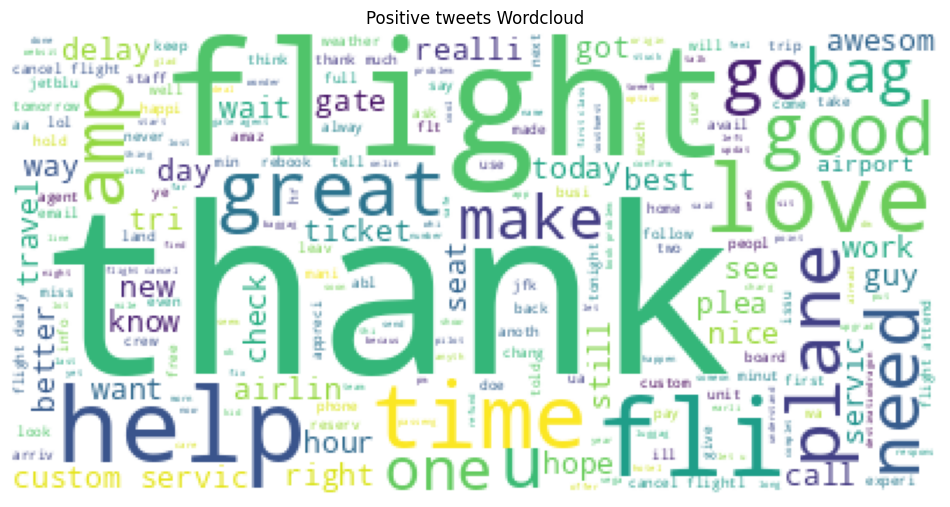

In [ ]:
# "stop words", in simple terms it refers to the most common words in a language.
# These are typically uninformative words, such as "the" or "and", for example,
# that are thus removed during preprocessing in many Natural Language Processing (NLP) applications.
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

**Observations:**

1.People like to say thank you when they are happy with airline.

## NEGATIVE Tweets Word Cloud

Text(0.5, 1.0, 'Negative tweets Wordcloud')

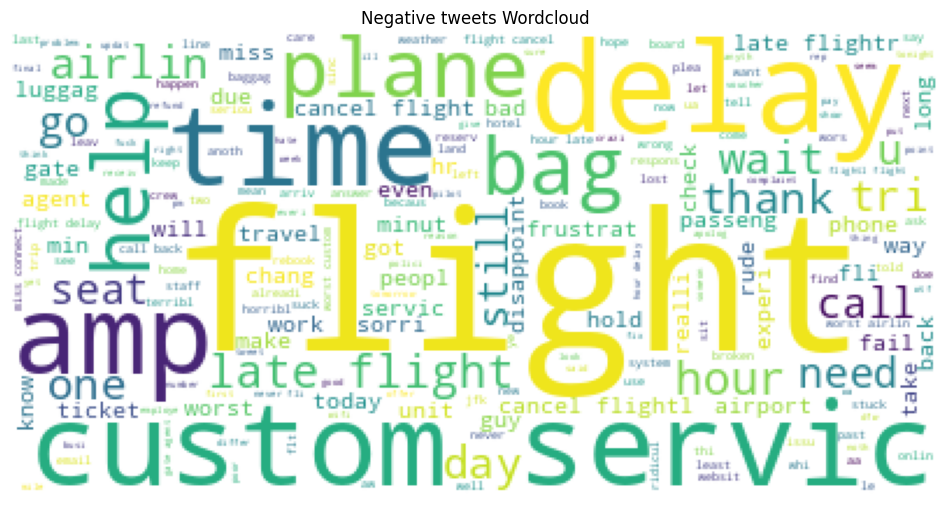

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
negative_tweets=negative_tweets.replace('flight', '')
#negative_tweets=negative_tweets.replace('plane', '')
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

## NEUTRAL Tweets Word Cloud

Text(0.5, 1.0, 'Negative tweets Wordcloud')

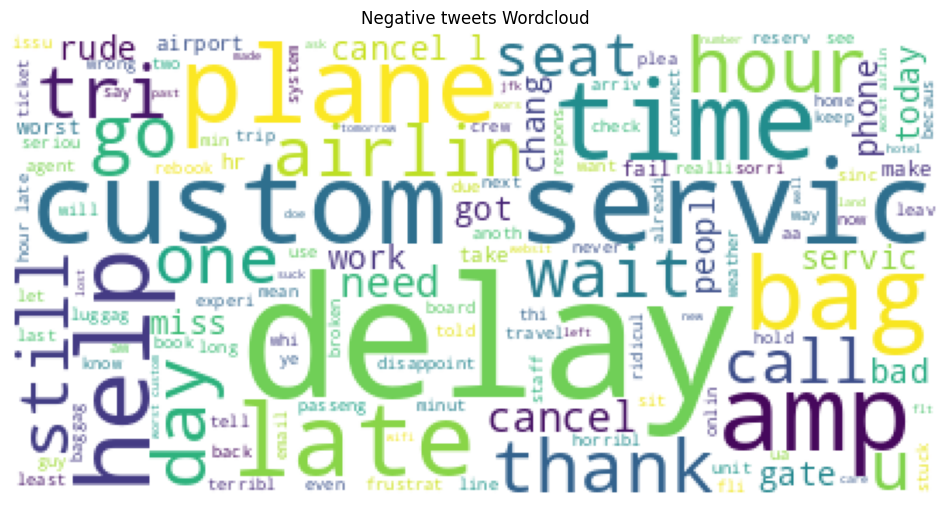

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
neutral_tweets=neutral_tweets.replace('flight', '')
#neutral_tweets=neutral_tweets.replace('plane', '')
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

# Saving Step 2. Pre-Processing Data

In [ ]:
#Save second round cleaned tweets_df
cleaned_tweets_df.to_csv(OutputFiles+"/Step2_PreProcessing_Cleaned_Tweets.csv", index = False)
print(colored("DATA SAVED", "green"))

DATA SAVED


### Read

###### TF-IDF using the Scikit-Learn Library

# ----DONE----